EE 502 P: Analytical Methods
# 4. Linear Algebra
## Prof. Eric Klavins, Electrical and Computer Engineering

### Tamara Bonaci, Department of Electrical and Computer Engineering
### October 20, 2021
Copyright &copy; 2021, University of Washington

Linear Algebra is arguably the most important branch of applied mathematics. It has applications to data analysis, machine learning, differential equations, network analysis, Internet search, computer graphics, robotic manipulation and more. The basic element of Linear Algebra is the matrix, which is simply a table of real (or complex) numbers. It is remarkable that this simple object can have so many interesting mathematical behaviors. This week we cover a lot of ground. It is assumed that at some point you took a Linear Algebra course, as is required by most engineering undergraduate degrees. However, in such courses, one usually spends a great deal of time doing Gaussian elimination, and computing determinants and inverses. Here, instead, we try to go into the properties of matrices that make them useful for engineering fields. These include: eigenvalues and matrix decomposition, arguable the most important aspects.

**Topics Covered**

- Basics
    - Vector spaces
    - Matrices
    - Matrices as transformations
        - Rotations
        - Reflections
        - Sheer
        - Projections
        - Data
        - Images
        - Networks
    - Determinants
    - Rank
    - Inverses
    - Non-singularity tests, including determinant
    - Inner products and orthogonality
    - Orthogonal matrices
- Eigenvalues
    - Definitions
    - Characteristic polynomial
    - Similarity
    - Eigenvectors
    - Diagonalization
- Jordan Canonical Form
    - Jordan form
- The Cayley-Hamilton Theorem
    - The minimal polynomial    
- The Matrix Exponential
    - Definition
    - Example
    - Using similarity to compute
- Singular value decomposition
    - Definitions
    - Example
    - Use in matrix approximation
    - Use in least squares
    - Principle component analysis

In [1]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

## Vector Spaces

Vectors are just lists of numbers. A set of vectors with the following properties shows up in many branches of mathematics and has many applications. We first study vectors before matrices because, for example, matrices are just vectors stacked together. Also, matrices can be said to be transformations on vectors.

**Def:** A **vector space** over $\mathbb{R}$ or $\mathbb{C}$ is a set $V$ of objects which is 
- Closed under addition: $u+v \in V$
- Is associative under addition: $u + (v + w) = (u+v)+w$
- Is commutative under addition: $u+v = v+u$
- Has an additive identity: $v + 0 = 0 + v = v$.
- Has additive inverses: $-v \in V$. 
- Is closed under scalar multiplication: $a v \in V$
- Is distributive: $a(u+v) = au + av$ and $(a+b)u = au + bu$, $a(bu)= (ab)u$
- Has a scalar multiplicative identity: $1 e = e$. 
Assuming $u,v,w \in V$ and $a,b \in \mathbb{C}$. 

We usually deal with $n$ dimensional finite vectors of real ($\mathbb{R}^n$) or imaginary ($\mathbb{C}^n$) numbers and write vectors as columns. For example

$$
v = \left (
\begin{array}{c}
1.0 \\
-3.5 \\
0 \\
2.3
\end{array}
\right ) \in \mathbb{R}^4
$$

However, infinite dimensional lists of of numbers (countable or not) can also form vector spaces. 

**Note:** Since it is annoying to write vectors as columns, we often will write $v = (1\;2\;3\;4)^T \in \mathbb{R}^4$ where the $T$ operation means "Transpose", taking a column vector and turning it into a row vector. More on this in the section on matrices.

Things that are not vector spaces:
- The set of positive valued vectors (with normal addition and scalar multiplication)
- The set of of points $x,y,z \in \mathbb{R}^3$ such that $x+y+z=1$, because $(0,0,0)$ is not in it
- The set of pairs of points inside the unit circle (because not all scalar multiples are in the set)

**Def:** A **subspace** of $V$ is a set $U \subseteq V$ that is also a vector space. 

**Example:** Let $U \subseteq \mathbb{R}^n$ be defined by all vectors in $\mathbb{R}^n$ for which the first element is zero. You can check that all the conditions above apply.

**Def:** The span of a set of vectors $v_1, v_2, ..., v_m \in \mathbb{R}^n$ is the set 

$$
span(v_1, ..., v_m) = \{ a_1 v_1 + ..., a_n v_n \;|\; a_i \in \mathbb{R} \}
$$

**Example:** Let $u = ( 1\; 1\; 0 )$ and $v = ( 0 \; 1 \; 1)$. Then 

$$
span(u,v) = \{ 
\left (
\begin{array}{c}
a \\
a+b \\
b
\end{array}
\right ) \;|\; a, b, \in \mathbb{R} \}
$$

For example, $(1 \; 2 \; 1)^T$ and $(-1 \; 0 \; 1)^T$ are in $span(u,v)$. 

**Thm:** The span of a set of vectors is a vector space. 

**Proof:** You can go through and check all the properties. For example, note that

$$
(a_1 v_1 + ..., a_n v_m) + (b_1 v_1 + ..., b_n v_m) = (a_1+b_1) v_1 + ..., (a_n+b_n) v_m
$$

since scalar multiplication is distributed for $\mathbb{R}^n$. Thus, $span(v_1,...,v_m)$ is closed under addition. 

**Def:** A set of vectors $v_1,...,v_n$ is **linearly independent** if there exist scalars $a_1, ..., a_n$ that are not all zero but for which 

$$
a_1 v_1 + ... + a_n v_n = 0.
$$

**Example:** Come up with two vectors in $\mathbb{R}$ that are linearly independent of each other, and two that are not. 

Not independent: 
$
u = \left (
\begin{array}{c}
1 \\
1
\end{array}
\right )$ and
$v = \left (
\begin{array}{c}
2 \\
2
\end{array}
\right )$ since $2 u + v = 0$. 

Independent: 
$
u = \left (
\begin{array}{c}
1 \\
0
\end{array}
\right )$ and
$v = \left (
\begin{array}{c}
0 \\
2
\end{array}
\right )$ since if  $a u + b v = 0$ then $a = 0$ and $2b=0$. 

**Def:** A linearly independent set of vectors $v_1,...,v_n$ is a basis for a vector space $V$ if $span(v_1,...,v_n) = V$. 

**Example:** The set $(1\;0\;0)^T$, $(0\;1\;0)^T$, and $(0\;0\;1)^T$ is a basis for $\mathbb{R}^3$. 

**Example:** The set $(1\;1)^T$, $(-1\;1)^T$ is a basis for $\mathbb{R}^2$. 

**Example:** Any set of two vectors is not a basis for $\mathbb{R}^3$.

**Def:** The dimension of a vector space is the number of elements in any basis for the space.

**Example:** The dimension of $span(u,v)$ of the subspace described above is $2$. A basis for $span(u,v)$ is in fact $u$ and $v$. 

**Def:** The dot product of $u$ and $v$ is the pairwise sum of the products of the elements in $u$ and $v$:

$$
u \cdot v = u^T v = u_1 v_1 + ... + u_n v_n \in \mathbb{R}.
$$

**Def:** Two vectors $u$ and $v$ are **orthogonal** if $u^Tv = 0$. 

**Example:** Show some dot products.

**Def:** The magnitude of a vector $v$ is the square root of its dot product with itself:

$$
||v|| = \sqrt{v^Tv}.
$$

**Example:** Show a magnitude calculation. 

In [2]:
# Vectors in numpy are just arrays of arrays. To make them into column vectors, you need to do the following:

u = np.array([
    [1],
    [2],
    [3]
])

print(u)
print("\n")

# Or you can do 

v = np.array([[4,5,6]]).transpose()
print(v)

x = np.array([np.random.rand(100)]).transpose()
x

[[1]
 [2]
 [3]]


[[4]
 [5]
 [6]]


array([[0.52226904],
       [0.19011257],
       [0.52741786],
       [0.49628041],
       [0.47853695],
       [0.00585502],
       [0.58909398],
       [0.09112042],
       [0.58116872],
       [0.90720592],
       [0.70814371],
       [0.53392794],
       [0.10222366],
       [0.73649901],
       [0.0683796 ],
       [0.87869582],
       [0.56875621],
       [0.08604421],
       [0.80346622],
       [0.81256396],
       [0.09336832],
       [0.70569234],
       [0.65418643],
       [0.95911494],
       [0.51661415],
       [0.38269045],
       [0.78101883],
       [0.22501074],
       [0.62528025],
       [0.95460434],
       [0.11181098],
       [0.55459587],
       [0.59035956],
       [0.78983493],
       [0.20844877],
       [0.19868855],
       [0.17884681],
       [0.42288778],
       [0.80097974],
       [0.21514774],
       [0.63547234],
       [0.52294493],
       [0.71008309],
       [0.20197414],
       [0.73800287],
       [0.50646017],
       [0.15621028],
       [0.482

In [3]:
# Numpy supports all the standard vector operations

print(u+v)
print("\n")
print(-5 * v)

[[5]
 [7]
 [9]]


[[-20]
 [-25]
 [-30]]


In [4]:
# To make the standard basis for n dimensional vectors, you can do the following,
# which gives the vector in R^10 with the fourth elemenet = 1 and the rest of the
# elements equal to zero

np.eye(1,10,3).transpose()

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [5]:
# You can also use sympy to get exact values for your arrays. Here, vectors are just n x 1 matrices

w = sm.Matrix([
    [1],
    [2],
    [3]]
)
x = sm.Matrix([[3],[4],[5]])
5*(w - x)

⎡-10⎤
⎢   ⎥
⎢-10⎥
⎢   ⎥
⎣-10⎦

In [6]:
# Similarly, you can make basis vectors. You have to first make a matrix though and take the mth column.

sm.eye(10)[:,3]

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

## Matrices

Definitions
---

**Def:** A **matrix** is a rectangular array of real or complex elements. If a real valued matrix $M$ has $n$ rows and $m$ columns, we write that $M \in \mathbb{R}^{n \times m}$.

**Example:** The following is a $3 \times 5$ matrix:

$$
\begin{pmatrix}
0&1&2&0&9\\
1&-1&2&-3&4 \\
0 & 0 & 1 & 1 & 1
\end{pmatrix}.
$$

**Example:** A gray scale bitmap can be thought of as a matrix with the $i,j$ entry corresponding to the gray level of the pixel at position $i,j$. Typically, values range from 0 (black) to 255 (white). Or they can be $0$ for black and $1$ for white, with $0.5$ for gray$. 

**Example:** Suppose we have 100 Senators in congress and 200 issues they have voted on in the present term. If Senator $i$ voted yes on issue $j$, put $M_{i,j} = 1$. If she voted no, put $M_{i,j} = -1$. If she didn't vote, put $M_{i,j} = 0$. 

**Example**: A matrix can represent a social network. For example, suppose that user $i$ is "friends with" user $j$. Then we would write $A_{i,j} = 1$ Otherwise, we would write $A_{i,j} = 0$. 

**Def:** A matrix can represent a **linear transformation** on other vectors. In this case we use **matrix multiplication** to take vectors to vectors:

$$
A x = y
$$

means 

$$
\begin{pmatrix}
a_{1,1} & ... & a_{1,n} \\
\vdots & \; & \vdots \\
a_{n,1} & ... & a_{n,n}
\end{pmatrix} \begin{pmatrix}
x_1 \\
\vdots \\
x_n
\end{pmatrix} = 
\begin{pmatrix}
a_{1,1} x_1 & ... & a_{1,n}x_n \\
\vdots & & \vdots \\
a_{n,1} x_1 & ... & a_{n,n} x_n
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$

**Example:** Show some matrix-vector multiplications.

**Example:** For example, given $\theta \in \mathbb{R}$ define the rotation matrix

$$
R(\theta) = 
\begin{pmatrix}
\cos \theta \; \sin \theta \\
-\sin \theta \; \cos \theta
\end{pmatrix}.
$$

For example,

$$
R\left(\frac{\pi}{4}\right) = 
\begin{pmatrix}
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
-\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}
\end{pmatrix}.
$$

These matrices when applied to vectors, rotate the vectors around the origin by $\theta$ radians, preserving their magnitudes. For example, 

$$
R\left(\frac{\pi}{4}\right)
\begin{pmatrix}
1\\
0
\end{pmatrix} = 
\begin{pmatrix}
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
-\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}
\end{pmatrix}\begin{pmatrix}
1\\
0
\end{pmatrix} = 
\begin{pmatrix}
\frac{\sqrt{2}}{2}\\
-\frac{\sqrt{2}}{2}
\end{pmatrix}
$$


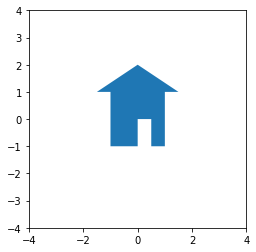

In [7]:
# To see how matrices act as transformations of points, let's draw a picture of a house.

points = np.array([
    [-1,-1],
    [0,-1],
    [0,0],
    [0.5,0],
    [0.5,-1],
    [1,-1],
    [1,1],
    [1.5,1],
    [0,2],
    [-1.5,1],
    [-1,1]
])

shape = pch.Polygon(points)
plt.gca().add_artist(shape)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().set_aspect(1)

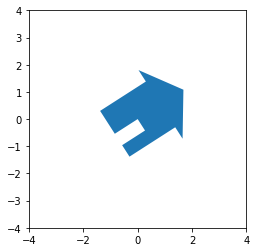

In [8]:
# Now we can rotate it by multiplying each point by a rotation matrix

def R(theta):
    return np.array([
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]        
    ])

new_points = [np.dot(R(1),p) for p in points]

shape = pch.Polygon(new_points)
plt.gca().add_artist(shape)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.gca().set_aspect(1)

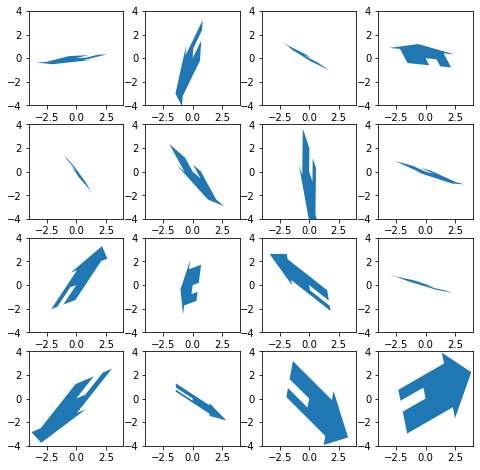

In [9]:
# More generally, matrices as transformations can rotate, reflect, sheer, project, and permute.
# Here aer some random transformations.

fig,ax = plt.subplots(4,4,figsize=(8,8))

for i in range(16):
    A = 4*(np.random.rand(2,2) - 0.5*np.ones((2,2)))
    new_points = [np.dot(A,p) for p in points]
    shape = pch.Polygon(new_points)
    a = ax[int(i/4), i%4]
    a.add_artist(shape)
    a.set_xlim(-4,4)
    a.set_ylim(-4,4)
    a.set_aspect(1)

Matrix Operations
---

Matrices are like numbers in that you can add them and multiply them, but you have to be careful not to treat them exactly like numbers. For example, you can't divide by a matrix (although you can multiply by its inverse if it exists). Also, with numbers you get properties like $xy = xy$, but that isn't always the case with matrices.

**Addition:** If $A$ and $B$ are matrices, then they can be added together if they have the same dimensions. In this case $(A+B)_{i,j} = A_{i,j} + B_{i,j}$. 

**Multiplication:** If $A \in \mathbb{R}^{n \times m}$ and $B \in \mathbb{R}^{m \times p}$ then $AB \in \mathbb{R}^{n \times p}$ is defined by 

$$
AB = \begin{pmatrix}
a_{1,1} & ... & a_{1,n} \\
\vdots & \; & \vdots \\
a_{m,1} & ... & a_{m,n}
\end{pmatrix} \begin{pmatrix}
b_{1,1} & ... & b_{1,p} \\
\vdots & \; & \vdots \\
b_{n,1} & ... & b_{n,p}
\end{pmatrix} = 
\begin{pmatrix}
c_{1,1} & ... & c_{1,p} \\
\vdots & \; & \vdots \\
c_{m,1} & ... & c_{m,p}
\end{pmatrix} 
$$

where

$$
c_{i,j} = a_{i,1} b_{1,j} + ... + a_{1,n} b_{n,j}.
$$

Said differently, the $i,j$ entry of $AB$ is the dot product of the $i$the row of $A$ with the $j$th column of $B$.

**Example:** Show a matrix multiplication.

**Example:** Two transformations can be done in succession to get a new transformation, simply by multiplying the two transformations together. For example, $R(\theta_1) R(\theta_2) = R(\theta_1 + \theta_2)$. This is in fact a restatement of [Ptolemy’s identities](https://www2.clarku.edu/faculty/djoyce/trig/ptolemy.html).

**Example:** If $A \in \mathbb{R}^{n \times n}$ then $A^m$ is $A$ multiplied by itself $m$ times.

**Not Commutative:** It is not always the case that $AB = BA$ for square matrices, as simple examples show.

**Indentity:** The **identity matrix** for $\mathbb{R}^{n \times n}$ is 

$$
I = \begin{pmatrix}
1 & 0 & ... & 0 \\
0 & 1 & ... & 0  \\
\vdots & \vdots & \; & \vdots \\
0 & 0 & ... & 1
\end{pmatrix}
$$

and has the property that 

$$
A I = I A = A
$$

for any $A \in \mathbb{R}^{n \times n}$.

**Inverses:** If $A \in \mathbb{R}^{n \times n}$ then if $AB = I$, $B$ is said to be the inverse of $A$ and is denoted $A^{-1}$. 

**Example**: The inverse of the matrix

$$
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix} 
$$

is

$$
\frac{1}{ad - bc} \begin{pmatrix}
d & -b \\
-c & a
\end{pmatrix} 
$$

as can be shown by multiplying the two matrices together. Note that if $ad = bc$ then the matrix is *not invertible*. 

**Transpose:** If $A \in \mathbb{R}^{n \times m}$, then $A^T$, the **transpose** of $A$, is the matrix obtained by setting the $i,j$ entry of $A^T$ to the $j,i$ entry of $A$. Thus, $A^T \in \mathbb{R}^{m \times n}$.

**Example:** Show a transpose of a matrix.

**Property:** $(AB)^T = B^T A^T$. This can be shown be thinking about the dot product of rows and columns in computing the product. 

In [10]:
# Examples in numpy

A = np.array([
    [1,0,3],
    [-1,5,0]
])

B = np.array([
    [7,8,9],
    [0,1,2],
    [3,4,5]
])

C = np.dot(A,B)

print(C)

[[16 20 24]
 [-7 -3  1]]


In [11]:
D = np.dot(A,A.transpose())
print(D)
E = np.linalg.inv(D)
print(E)
F = np.dot(D,E)
F[np.abs(F) < 0.0001] = 0
F

[[10 -1]
 [-1 26]]
[[0.1003861  0.003861  ]
 [0.003861   0.03861004]]


array([[1., 0.],
       [0., 1.]])

In [12]:
# In sympy, you can do things similarly, but get exact answers

A = sm.Matrix([
    [1,0,3],
    [-1,5,0]
])

B = sm.Matrix([
    [7,8,9],
    [0,1,2],
    [3,4,5]
])

C = A*B

C

⎡16  20  24⎤
⎢          ⎥
⎣-7  -3  1 ⎦

In [13]:
D = A * A.T
E = D.inv()
F = D*E
D, E, F

⎛          ⎡  26        ⎤        ⎞
⎜          ⎢ ───   1/259⎥        ⎟
⎜⎡10  -1⎤  ⎢ 259        ⎥  ⎡1  0⎤⎟
⎜⎢      ⎥, ⎢            ⎥, ⎢    ⎥⎟
⎜⎣-1  26⎦  ⎢         10 ⎥  ⎣0  1⎦⎟
⎜          ⎢1/259   ─── ⎥        ⎟
⎝          ⎣        259 ⎦        ⎠

The Determinant
---

The determinant of a square matrix is a way to sum up the matrix with one number. For example, it helps us distinguish which matrices act like zero in the sense that they can't be inverted. 

**Def:** If $A \in \mathbb{R}^{n \times n}$, the determinant of $A$, denoted $\det(A)$ or $|A|$ is defined as follows.

- If $n=1$, then $|A| = A$. 
- If $n=2$, then $|A| = a_{1,1} a_{2,2} - a_{2,1} a_{2,2}$
- If $n=3$, then $|A| = a_{1,1} A(1,1) - a_{1,2} A(1,2) + a_{1,3} A(1,3)$ where $A(i,j)$ is the matrix obtained from $A$ by removing the $i$th row and $j$th column.
- If $n=4$, then $|A| = a_{1,1} A(1,1) - a_{1,2} A(1,2) + a_{1,3} A(1,3) + a_{1,4}A(1,4)$
- Etc.

Note that any row or column can be used in the above definition, not just the first row. 

**Identity:** |I| = 1

**Multiplication:** $|AB| = |A||B|$. Proof is a bit complicated. 

**Inverse:** $|A^{-1}| = \frac{1}{|A|}$. This is because $1 = |I| = |A^{-1}A| = |A^{-1}||A|$. 

**Zero columns or rows:** The determinant of any matrix with a column (or row) of zeros is zero. 

**Transpose:** $|A^T| = |A|$. 

**The determinant of an upper triangular matrix**: If all entries below the diagonal of a matrix are zero, then the determinant is the product of the diagonal. 

**Example:** Show the computation of some determinants.

In [14]:
# In numpy

A = np.array([[1,2],[3,4]])
np.linalg.det(A)

-2.0000000000000004

In [15]:
# In sympy

A = sm.Matrix([[1,2],[3,4]])
A.det()

-2

Non-singular Matrices
---

Once again, not all matrices can be inverted. Those that can are special and in general are called non-singular.

**Def:** The **rank** of a matrix is the number of independent columns (or rows) of the matrix. 

**Example:** Show 3D matrices with ranks 1, 2 and 3. 

**Def:** A matrix $A \in \mathbb{R}^{n \times n}$ is called **nonsingular** if it has an inverse. 

**Thm:** The following are equivalent:

- $A$ is non-singular.
- $A$ is invertible.
- $A$ has full rank (its rank is equal to its number of columns or rows).
- $\det(A) \neq 0$.
- The equation $y = Ax$ has one solution (namely $A^{-1}y$). 
- The only solution to $Ax = 0$ is $x = 0$. 
- The rows of $A$ are linearly independent.
- The columns of $A$ are linearly independent.
- Zero is not an eigenvalue (see next section).

**Example:** Show some singular and non-singular matrices. 

**Example:** Show an example of the solution to $Ax=y$ where $A$ is singular.

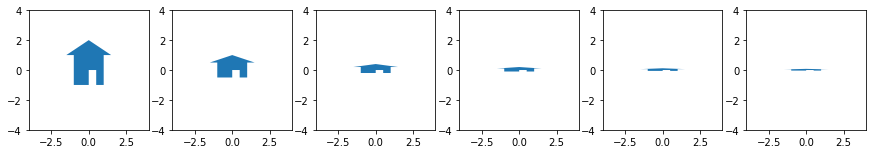

In [16]:
# Note that a singular matrix collapses a space to a lower dimensional
# subspace when used as a transformation.

fig,ax = plt.subplots(1,6,figsize=(15,5))

for i in range(6):
    A = np.array([
        [1,0],
        [0,1/(1+i**2)]
    ])    
    new_points = [np.dot(A,p) for p in points]
    shape = pch.Polygon(new_points)
    a = ax[i]
    a.add_artist(shape)
    a.set_xlim(-4,4)
    a.set_ylim(-4,4)
    a.set_aspect(1)

Special Matrices
---

There are all sorts of special types of matrix. We cover a few here, but the list goes on and on.

**Def:** A matrix $A$ is symmetric if $A^T = A$.

**Property:** If $A$ and $B$ are symmetric then $AB$ is symmetric if and only if $A$ and $B$ commute (i.e. $AB = BA$). To show this, we have to show that $(AB)^T = AB$. We have,

$$
(AB)^T = (BA)^T = A^TB^T = AB.
$$

**Property:** $A A^T$ and $A^T A$ are symmetric for any $A$. This is because $(A A^T)^T = (A^T)^T A^T = A A^T$. 

**Def:** A matrix $A$ is **orthogonal** if $AA^T = A^T A = I$. Equivalently, $A$ is orthogonal if $A^{-1} = A^T$.

**Example:** Rotations matrices and permutation matrices.

**Property:** The columns of an orthogonal matrix $A \in \mathbb{R}^{n \times n}$ form an **orthonormal basis** of $\mathbb{R}^{n \times n}$. That is

- Each column is a unit vector
- Each pair of columns is orthogonal
- And they are all independent (follows from the second point). 

**Property:** The determinant of an orthogonal matrix $A$ is either 1 or -1. This is because 

$$
1 = |I| = |AA^T| = |A||A^T| = |A|^2. 
$$

In [17]:
A = np.random.randint(-1,1,(4,7))
B = np.dot(A,A.transpose())
B - B.transpose()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

## Eigenvalues

The eigenvalues of a matrix are a fundamental way to extract, for example, what the matrix *does*. It also allows us to describe how two matrices might be in fact quite similar to each other in the sense that they have the same eigenvalues. Really, the matrix itself becomes less important, and its eigenvalues become its defining characteristic (possibly shared by other matrices). 

**Def:** If $A \in \mathbb{R}^{n \times n}$ then $\lambda \in \mathbb{C}$ is an **eigenvalue** if there exists a **non-zero** vector $v \in \mathbb{C}^n$ such that

$$
A v = \lambda v.
$$

In this case, $v$ is called an **eigenvalue**. 

Another way to write the above equation is to put everything on the left hand side to get:

$$
(\lambda I - A)v = 0 .
$$

Since $v$ is non-zero, it must be the case that $\lambda I - A$ is singular. Thus, to compute eigenvalues, we find values of $\lambda$ that make $\lambda I - A$ singular. That is, we solve the equation

$$
\mathrm{det}(\lambda I - A) = 0.
$$

**Def:** This last equation is super important and the term $\mathrm{det}(\lambda I - A)$ is called the **characteristic polynomial** of $A$.

**Example:** Say
$$
A =\begin{pmatrix}0&1\\1&-1\end{pmatrix}.
$$
then the characteristic polynomial is

\begin{align}
\mathrm{det}(\lambda I - A) 
& = \left|
\left(\begin{array}{cc}
\lambda & 0 \\
0 & \lambda
\end{array}\right) -
\left(\begin{array}{cc}
0 & 1 \\
1 & -1
\end{array}\right)
\right| \\
& =\left|
\begin{array}{cc}
\lambda & -1 \\
-1 & \lambda+1
\end{array}
\right| \\
& =
\lambda(\lambda+1)-1 \\
& = 
\lambda^2 + \lambda-1
\end{align}

Hence, 

$$
\lambda = \frac{-1\pm\sqrt{5}}{2}.
$$

or $-1.62$ and $0.62$. 

The eigenvectors of a system can be found with

$$
A x = \lambda x
$$

In this case, we have

$$
\begin{pmatrix}0&1\\1&-1\end{pmatrix}
\begin{pmatrix}x_1\\x_2\end{pmatrix} = 
\lambda
\begin{pmatrix}x_1\\x_2\end{pmatrix}
$$

This is an under-constrained set of equations, which amount to $x_2 = \lambda x_1$ and $x_1 - x_2 = \lambda x_2$. Choosing $x_1 = 1$ we use the first equation to get $x_2 = \lambda$. 

So the first eigenvector can be chosen to be

$$
{\bf x}_1 = \begin{pmatrix}1\\\frac{-1-\sqrt{5}}{2}\end{pmatrix} \approx 
\begin{pmatrix}1\\-1.62\end{pmatrix}
$$

And similarly, the second can be chosen to be
$$
{\bf x}_2 = \begin{pmatrix}1\\\frac{-1+\sqrt{5}}{2}\end{pmatrix} \approx 
\begin{pmatrix}1\\0.62\end{pmatrix}.
$$

Note that these are not unique. You can choose any multiple of an eigenvector and it is still an eigenvector.

Matrix Similarity
---

As we said above, if two matrices have the same eigenvalues, they are in some sense equivalent. The following definition captures this idea.

**Def:** $A$ and $B$ are **similar** if there exists an invertible matrix $A$ such that $B = Q A Q^{-1}$. 

**Properties:**

- Similar matrices have the same determinant. $|B| = |Q A Q^{-1}| = |Q||Q^{-1}||A| = |A|$. 
- Similar matrices have the same characteristic polynomial. 
\begin{eqnarray}
|\lambda I - B| & = & |\lambda I - Q A Q^{-1}| \\
                & = & |\lambda Q Q^{-1} -  Q A Q^{-1}| \\
                & = & |Q ( \lambda I - A ) Q^{-1}| \\
                & = & |Q||Q^{-1}||\lambda I - A| \\
                & = & |\lambda I - A|
\end{eqnarray}
- Similar matrices have the same eigenvalues.

**Example**: Show a $2 \times 2$ example.

In [18]:
# Here is an example showing that at least in this case, the above equality holds.

A = sm.Matrix(np.random.randint(-1,1,(4,4)))
Q = sm.Matrix(np.random.randint(-1,1,(4,4)))

while Q.det() == 0: # Make sure Q is invertible
    Q = sm.Matrix(np.random.randint(-1,1,(4,4)))

B = Q * A * Q.inv()

s = sm.symbols("s")
A, (s*sm.eye(4) - A).det(), B, (s*sm.eye(4) - B).det()

⎛⎡-1  0  0   0 ⎤                  ⎡1  -1  0   -1⎤                ⎞
⎜⎢             ⎥                  ⎢             ⎥                ⎟
⎜⎢0   0  -1  -1⎥   4      3    2  ⎢1  -1  0   -1⎥   4      3    2⎟
⎜⎢             ⎥, s  + 2⋅s  + s , ⎢             ⎥, s  + 2⋅s  + s ⎟
⎜⎢0   0  0   0 ⎥                  ⎢1  -1  -1  0 ⎥                ⎟
⎜⎢             ⎥                  ⎢             ⎥                ⎟
⎝⎣0   0  -1  -1⎦                  ⎣1  -1  0   -1⎦                ⎠

Diagonalization
---

If whole sets of matrices are essentially the same, then there must be some way to write down the best representative of a such a set of equivalent matrices. If we could find it, it would be a **canonical form** for the matrix. It would be really useful as well if we could say something about **all** matrices having a given set of eigenvalues by simply looking at the canonical form of those matrices. Our first attempt is called **diagonalization**, which attempts to represent an equivalence class of matrices by one that has all the eigenvalues on the diagonal.

Consider the matrix $A = \mathbb{R}^{n \times n}$. Say $A$ has distinct real eigenvalues $\lambda_1$ and $\lambda_2$ with eigenvectors $v_1$ and $v_2$. Then

$$
A v_1 = \lambda_1 v_1 \\
A v_2 = \lambda_2 v_2 
$$

which can be written

$$
\left( A v_1 \; A v_2 \right) = ( \lambda_1 v_1 \; \lambda_2 v_2 )
$$

or even better

$$
A ( v_1 \; v_2 ) = ( v_1 \; v_2 ) 
\begin{pmatrix}\lambda_1 & 0\\ 0 & \lambda_2\end{pmatrix}
$$

If we define 

$$
P = ( v_1 \; v_2 )
$$

and 

$$
D = \begin{pmatrix}\lambda_1 & 0\\ 0 & \lambda_2\end{pmatrix}
$$

then we get

$$
AP = PD
$$

or

$$
A = PDP^{-1}
$$

When there exists a $P$ that satisfies this last equation (whether $D$ is diagonal or not), then $A$ and $D$ are called *similar*. 

**Note:** More generally (i.e. when the eigenvalues are not distinct), any matrix is similar to one in *Jordan Form*, which is a canonical representation of a matrix. Having a matrix in a canonical form makes it easy to see what it does as a dynamical system. More on this later.

The Eigenvalues of Similar Matrices are Equal
---

If $A = PQP^{-1}$ and $\lambda$ is an eigenvalue of $A$, then for an eigenvector $x$ then

$$
Q P x = P A P^{-1} P x = P A x = P \lambda x = \lambda P x
$$

thus, $\lambda$ is also an eigenvalue of $Q$ with eigenvector $P x$. 

**Theorem:** Define the relation $\equiv$ by saying that $A \equiv B$ if and only if $A$ and $B$ have the same eigenvalues. Then $\equiv$ is an *equivalence relation*. 

**Proof:** Todo.

Computing Eigenvalues Symbolically
---

Python can do symbolic math using the [SymPy](https://docs.sympy.org/latest/tutorial/index.html) library. For example, to get the eigenvalues of $A$ we do:

In [19]:
A = sm.Matrix([[0, 1], [-1,0]])
lam1,lam2=A.eigenvals()
lam1,lam2

(-ⅈ, ⅈ)

Note that `lam1` and `lam2` are *symbolic expressions*. To get numerical values from them, use the `N` method.

In [20]:
sm.N(lam1),sm.N(lam2)

(-1.0⋅ⅈ, 1.0⋅ⅈ)

You can also get the eigenvectors. The method provided returns a list of tuples of the form

    (eigenvalue:algebraic multiplicity, [eigenvectors]).

In [21]:
A.eigenvects()

⎡⎛       ⎡⎡ⅈ⎤⎤⎞  ⎛      ⎡⎡-ⅈ⎤⎤⎞⎤
⎢⎜-ⅈ, 1, ⎢⎢ ⎥⎥⎟, ⎜ⅈ, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝       ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠⎦

A somewhat easier way to see the eigenvalues is to us *diagonalization*, which puts the eigenvectors as the columns of a matrix:

In [22]:
P, D = A.diagonalize()
P, D

⎛⎡ⅈ  -ⅈ⎤  ⎡-ⅈ  0⎤⎞
⎜⎢     ⎥, ⎢     ⎥⎟
⎝⎣1  1 ⎦  ⎣0   ⅈ⎦⎠

We can pick off the eigenvectors from `P` using the `row` and `col` operators on matricies.

In [23]:
x1=P.col(0)
x2=P.col(1)
x1

⎡ⅈ⎤
⎢ ⎥
⎣1⎦

Notice that SymPy is also includes imaginary numbers. So you can get the eigenvalues of the more interesting spiral matrix from the pendulum example too

In [24]:
A = sm.Matrix([[0, 1], [-1,-1]])
lam1,lam2=A.eigenvals()
lam1,lam2

⎛  1   √3⋅ⅈ    1   √3⋅ⅈ⎞
⎜- ─ - ────, - ─ + ────⎟
⎝  2    2      2    2  ⎠

In [25]:
print(sm.re(lam1))
print(sm.im(lam1))
print(abs(lam1))
print(sm.conjugate(lam1))

-1/2
-sqrt(3)/2
1
-1/2 + sqrt(3)*I/2


## Jordan Canonical Form

Not all matrices can be diagonalized. This is because the matrix of eignvectors, which we use for $P$ and $P^{-1}$ may not be invertible. However, all matrices can be put into *Jordan* form. 

A *Jordan Block* of size $m$ and value $\lambda$ is a matrix
$J_m(\lambda)$ having the value $\lambda$ repeated along the main
diagonal, ones along the superdiagonal and zeros everywhere else. For
example:

$$
J_2(4) = \begin{pmatrix} 
4 & 1 \\
0 & 4
\end{pmatrix} \;\;\;\;\;\;\; \mathrm{and}\;\;\;\;\;\;\;
J_4(-\frac{1}{2}) = \begin{pmatrix}
-\frac{1}{2} & 1 & 0 & 0 \\
0 & -\frac{1}{2} & 1 & 0 \\
0 & 0 & -\frac{1}{2} & 1 \\
0 & 0 & 0 & -\frac{1}{2}
\end{pmatrix} .
$$

A Matrix is in *Jordan Form* is a block diagonal matrix consisting of several Jordan blocks. For example, 
we can form a Jordan Form from two copies of $J_2(4)$ and one copy of $J_4(-\frac{1}{2})$ as follows.
$$
J = \begin{pmatrix}
J_2(4) & 0 & 0 \\
0 & J_2(4) & 0 \\
0&  0 & J_4(-\frac{1}{2})
\end{pmatrix} = \begin{pmatrix}
4 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 4 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 4 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 4 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -\frac{1}{2} & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -\frac{1}{2} & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -\frac{1}{2} & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -\frac{1}{2} \\
\end{pmatrix} .
$$

Notice that the eigenvalues and eigenvectors of a matrix in Jordan
Form can be read off without your having to do any work.
- The eigenvalues are along the main diagonal (this is true of any upper-triangular matrix).
- Eigenvectors can be found on the columns at the beginning of each block.

For example, in the above form $J$, we have the eigenvalues $\lambda =
1$ with multiplicity $4$ and $\lambda = \frac{1}{2}$ with multiplicity
$4$. Furthermore, there are two eigenvectors associated with $\lambda =
1$, namely

$$
v_1 = \begin{pmatrix}
1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix}, \;\;
v_2 = \begin{pmatrix}
0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix}
$$

and one eigenvector associated with the eigenvalue $\lambda = - \frac{1}{2}$, namely

$$
v_3 = \begin{pmatrix}
0 \\ 0 \\ 0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0
\end{pmatrix} .
$$

These choices are not unique: any two basis vectors for $\mathrm{span} ( v_1, v_2 )$ can
be chosen as the eigenvectors for $\lambda = 1$ and any non-zero
scalar multiple of $v_3$ can be chosen as the eigenvector for $\lambda
= - \frac{1}{2}$.

**Theorem**: Any matrix can be put into Jordan Form.

We will not prove this statement in this course. However, [here](https://github.com/klavins/ECE447/blob/master/lectures/jordan-form.pdf) is a proof you can read if you are interested. 

You can use `sympy` to put matrices into Jordan form. For example:

In [26]:
# Jordan form of a matrix

A = sm.Matrix(4, 4, [6, 5, -2, -3, -3, -1, 3, 3, 2, 1, -2, -3, -1, 1, 5, 5])
A

⎡6   5   -2  -3⎤
⎢              ⎥
⎢-3  -1  3   3 ⎥
⎢              ⎥
⎢2   1   -2  -3⎥
⎢              ⎥
⎣-1  1   5   5 ⎦

In [27]:
A.diagonalize()

MatrixError: Matrix is not diagonalizable

In [28]:
P,J = A.jordan_form()
J

⎡2  1  0  0⎤
⎢          ⎥
⎢0  2  0  0⎥
⎢          ⎥
⎢0  0  2  1⎥
⎢          ⎥
⎣0  0  0  2⎦

## Cayley-Hamilton Theorem



**Caley-Hamilton Theorem**: A matrix solves its own characteristic polynomial.

**Proof:** We proof this here for diagnonalizable matrices $A = Q D Q^{-1}$. In general, the argument extends to Jordan form, but it is more complicated. Also, as we will see when we get to Differential Equations, the theorem is very easy to prove using matrix exponentials.

First note that since the roots of the characteristic polynomial $p(s)$ are the eigenvalues, we have

$$
p(s) = (s - \lambda_1)(s - \lambda_2) \dots (s - \lambda_n). 
$$

Therefore, 

\begin{eqnarray}
p(A) & = & (A - \lambda_1 I)(A - \lambda_2 I) \dots (A - \lambda_n I) \\
     & = & (Q D Q^{-1} - \lambda_1 I)(Q D Q^{-1} - \lambda_2 I) \dots (Q D Q^{-1} - \lambda_n I) \\
     & = & Q (D - \lambda_1 I)(D - \lambda_2 I) \dots (D - \lambda_n I) Q^{-1} \\
     & = & Q p(D) Q^{-1},
\end{eqnarray}

which is zero if and only if $p(D)$ is zero. But,

$$
p(D) = \begin{pmatrix}
p(\lambda_1) & & \\
             & \ddots & \\
             & & p(\lambda_n)
\end{pmatrix} = 0 .
$$

**Example: Computing Inverses** The theorem can be used to compute the inverse of a matrix. For example, let


$$
A = \begin{pmatrix}
1 & 2 \\
-1 & 4
\end{pmatrix} .
$$

$A$ has characteristic polynomial 

$$
s^2 - 5 s + 6
$$

Then 

$$
A^{-1} = \frac{5I - A}{6}
$$

Thus, 

$$
A^{-1} = \frac{1}{6} \left [
\begin{pmatrix}
5 & 0 \\
0 & 5
\end{pmatrix} - \begin{pmatrix}
1 & 2 \\
-1 & 4
\end{pmatrix}
\right ] = 
\begin{pmatrix}
\frac{2}{3} & -\frac{1}{3} \\
\frac{1}{6} & \frac{1}{6}
\end{pmatrix} .
$$

**Example: Computing Powers:** The Cayley Hamilton Theorem can be used to compute powers of matrices. For example, consider the matrix finding $A^5$ where

$$
A = \begin{pmatrix}
1 & 2 \\
-1 & 4
\end{pmatrix} .
$$

$A$ has characteristic polynomial 

$$
s^2 - 5 s + 6
$$

which means that 

$$
A^2 = 5A - 6I.
$$

Multiplying by $A$ on each side gives

\begin{eqnarray}
A^3 & = & 5 A^2 - 6A  \\
    & = & 5(5A-6I) - 6A  \\
    & = & 19 A - 30 I
\end{eqnarray}

Multiplying again by $A$ gives

\begin{eqnarray}
A^4 & = & 19 A^2 - 30 A \\
    & = & 19 (5A-6I) - 30 A \\
    & = & 65 A - 114 I
\end{eqnarray}

And

\begin{eqnarray}
A^5 & = & 65 A^2 - 114 A \\
    & = & 65 (5A-6I) - 114 A \\
    & = & 211 A - 390 I
\end{eqnarray}

In [29]:
65*5-114, 65*6

(211, 390)

In [30]:
s = sm.symbols("s")
A = sm.Matrix([
    [1,2],
    [-1,4]
])
cp = (s*sm.eye(2)-A).det()
cp

 2          
s  - 5⋅s + 6

In [31]:
A**2 - 5*A + 6*sm.eye(2)

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [32]:
A**5, 211*A - 390*sm.eye(2)

⎛⎡-179  422⎤  ⎡-179  422⎤⎞
⎜⎢         ⎥, ⎢         ⎥⎟
⎝⎣-211  454⎦  ⎣-211  454⎦⎠

In [33]:
A.inv()

⎡2/3  -1/3⎤
⎢         ⎥
⎣1/6  1/6 ⎦

In [34]:
(5, 19, 65, 211), ()

((5, 19, 65, 211), ())

## Matrix Exponentials

One remarkable things about the Taylor Series is that it applies to matrices too. In fact, you can use it to define all sorts of functions of matrices, like $\sin$ and $\cos$. Here, we define the matrix exponential, which will come back in full force next week when we talk about differential equations.

**Def:** When $A \in \mathbb{R}^{n\times n}$, then the we define the **matrix exponential** $e^{A}$ by

$$
e^{A} \triangleq I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \dots
$$

**Warning:** The matrix exponential is **not** just the elementwise exponentials.

If $A$ is diagonalizable, then $A = P D P^{-1}$ for some $P$ and $D$. In this case,

\begin{align}
e^{A} & = e^{PDP^{-1}} \\
       & = I + PDP^{-1} + \frac{(PDP^{-1})^2}{2!} + \dots \\
       & = I + PDP^{-1} + \frac{PDP^{-1}PDP^{-1}}{2!} + \dots \\
       & = I + PDP^{-1} + \frac{PD^2P^{-1}}{2!} + \dots \\
       & = P \left(I + D + \frac{D^2}{2!} + \dots \right)P^{-1} \\
       & = P e^{D} P^{-1}.
\end{align}


Example: Matrix Exponential of a Jordan Block
---

The matrix exponential of a diagonal matrix is straightfoward to compute. However, with a Jordan block, the extra ones on the upper diagonal introduce new terms. Here is an example of what happens with a simple Jordan Block

$$
J = \begin{pmatrix}
-1 & 1 \\
 0 & -1
\end{pmatrix}
$$

This matrix has a repeated eigenvalue (-1) and is not diagonalizable due to a one dimensional eigenspace.

Using the definition of the matrix exponential, we compute:

$$
J^2 = \begin{pmatrix}
1 & -2 \\
 0 & 1
\end{pmatrix}
$$

and

$$
J^2 = \begin{pmatrix}
-1 & 3 \\
 0 & -1
\end{pmatrix} .
$$

You can see a pattern emerging. We have

$$
J^n = \begin{pmatrix}
(-1)^{n-1} & n(-1)^n \\
 0 & (-1)^{n-1}
\end{pmatrix} .
$$

So the $(1,1)$ and $(2,2)$ entries of $e^{J}$ are 

$$
1 + -1 + \frac{1}{2!} - \frac{1}{3!} + \frac{1}{4!} + ... = e^{-1} = \frac{1}{e}.
$$

And the $1,2$ entry is

\begin{align}
 & = 0 + 1 - 2\frac{1}{2!} + 3\frac{1}{3!} - 4\frac{1}{4!} + ... \\ 
 & = 1 - 1 + \frac{1}{2!} - \frac{1}{3!} + ... \\
 & = e^{-1} = \frac{1}{e}.
\end{align}

Thus,

$$
e^{J} = \begin{pmatrix}
e^{-1} & e^{-1} \\
0 & e^{-1}
\end{pmatrix} .
$$

**Property:** If $A$ and $B$ are similar, via the transform $Q$, then $e^B = Q e^A Q^{-1}$. 

**Property:** if $\dot x = Ax$ then $x(t) = e^{At}x(0)$. 

In [35]:
# Sympy has this built in

t = sm.symbols("t")
J = sm.Matrix([[-1,1],[0,-1]])*t
J,sm.exp(J)

⎛          ⎡ -t     -t⎤⎞
⎜⎡-t  t ⎤  ⎢ℯ    t⋅ℯ  ⎥⎟
⎜⎢      ⎥, ⎢          ⎥⎟
⎜⎣0   -t⎦  ⎢       -t ⎥⎟
⎝          ⎣ 0    ℯ   ⎦⎠

In [36]:
J = sm.Matrix([
    [-1,1,0],
    [0,-1,0],
    [1,0,1]
])
J,sm.exp(J)

⎛             ⎡    -1          -1       ⎤⎞
⎜             ⎢   ℯ           ℯ        0⎥⎟
⎜             ⎢                         ⎥⎟
⎜⎡-1  1   0⎤  ⎢                -1       ⎥⎟
⎜⎢         ⎥  ⎢    0          ℯ        0⎥⎟
⎜⎢0   -1  0⎥, ⎢                         ⎥⎟
⎜⎢         ⎥  ⎢   -1           -1       ⎥⎟
⎜⎣1   0   1⎦  ⎢  ℯ     ℯ    3⋅ℯ     ℯ   ⎥⎟
⎜             ⎢- ─── + ─  - ───── + ─  ℯ⎥⎟
⎝             ⎣   2    2      4     4   ⎦⎠

## Singular Value Decomposition

Diagonalization is useful for showing the structure of a matrix, but it has two issues. First, it doesn't work on non-square matrices. Second, while the eigenvalues have many interpretations (which we will see when we get to  differential equations), there are somethings they do not tell you about a matrix. On the other hand, singular values can be computed for any matrix, and they tell you a great deal, especially about matrices with a lot of structure.

**Theorem:** Any matrix $A \in \mathbb{R}^{m \times n}$ can be factored into a **singular value decomposition** (SVD),

$$
A = U \Sigma V^T,
$$

where $U \in \mathrm{R}^{m \times m}$ and $V \in \mathrm{R}^{n \times n}$ are orthogonal matrices and $\Sigma \in \mathbb{R}^{m \times n}$ is a diagonal matrix with $r = \mathrm{rank}(A)$ leading positive diagonal entries. 

Let $p = \min(m,n)$. Then the diagonal entries of $S$ are denoted by $\sigma_1, ..., \sigma_p$ are are called the **singular values** of $A$.

Interestingly, the singular values satisfy 

$$
\sigma_1 > \sigma_2 > ... > \sigma_p . 
$$

The columns of $U$ are called the **left-singular vectors** of $A$ and the columns of $V$ are called the **right-singular vectors** of $A$. The singular values essentially say how important these vectors are in describing the matrix. 

In [37]:
import numpy as np

# Example: Compute the SVD of a matrix

# Example Matrix
A = np.array([
    [1, 2, 0, -1, 0], 
    [3, 4, 1,  0, 0], 
    [5, 6, 2,  3, 4]
])

# Compute the SVD
U, s, VT = np.linalg.svd(A)

print("U = ", U)
print("\n")
print("Singular Values = ", s)
print("\n")
print("V = ", VT.T)

U =  [[-0.16097514 -0.55900274 -0.81338978]
 [-0.43793718 -0.69810585  0.5664444 ]
 [-0.88447613  0.44739709 -0.1324304 ]]


Singular Values =  [10.62302402  2.92102308  0.78675585]


V =  [[-0.55513075 -0.14253048  0.28444838 -0.69298409 -0.33223046]
 [-0.69476976 -0.41973182 -0.19775431  0.54890746  0.02672124]
 [-0.20774588  0.06733543  0.38332553 -0.11667757  0.88980642]
 [-0.23462747  0.6508658   0.52887893  0.40483083 -0.27878798]
 [-0.33304119  0.61265807 -0.67329857 -0.20241541  0.13939399]]


In [38]:
# The SVD function does not give you the Sigma matrix, so we construct it here.

# Create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))

# populate Sigma with n x n diagonal matrix
for i in range(len(s)):
    Sigma[i,i] = s[i]

Sigma

array([[10.62302402,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.92102308,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.78675585,  0.        ,  0.        ]])

In [39]:
# Now we can reconstruct the matrix to make sure it worked.

B = np.matmul(np.matmul(U,Sigma),VT)
B[np.abs(B) < 0.0001] = 0
print(B)

[[ 1.  2.  0. -1.  0.]
 [ 3.  4.  1.  0.  0.]
 [ 5.  6.  2.  3.  4.]]


SVD For Image Compression
---

The remarkable thing about the SVD is that the singular values rank the importance of the columns of $U$ (or the columns of V). This idea is captured by the **Ekhart-Young** theorem, which states:

**Theorem:** Define $\hat\Sigma$ to be the first $k$ columns of $\Sigma$. Define $\hat V$ to the the first $k$ rows of $V$ and put

$$
B  = U \hat \Sigma \hat V .
$$

If $k < \mathrm{rank}(A)$ then $B$ is the closed rank $k$ matrix to $A$ among all matrices (using essentially any norm on matrices). Furthermore, $||A-B|| \approx \sigma_{k+1}$.

We can use this in many ways. For example, $B$ can be considered a bitmap of an image, so that $A_{i,j}$ is the gray scale intensity of the pixel at position $(i,j)$. 

In this case, we define 

$$
T = U \hat \Sigma
$$

and note that $U$ is $n \times n$ and $\Sigma$ is $k \times k$ so $T$ is $n \times k$. Also, $V$ is $k \times k$. Thus, the total number of elements needed to store $B$ is

$$
nk + k^2
$$

compared to the original image's $n \times m$ elements. 

An algorithm for selecting $k$ is to (a) compute the SVD and choose $k$ so that $\sigma_{k+1}$ is less than some threshold set by the user. Then just take the first $k$ elements of $U$, $\Sigma$ and $V$.

Principal Component Analysis
---

In statistics, principle component analysis (PCA) entails computing the SVD of a dataset after centering the data for each attribute around the mean. That is, write

$$
X = A - \mu_A I
$$

where $\mu_A = \mathrm{mean}(A)$ is the mean of the values in $A$. 

We can then decompose the matrix $X$ to get

$$
X  = U \Sigma V^T
$$

We take the first two principle components of $X$ and form $\hat\Sigma$ and $\hat V$. The matrix $U\hat\Sigma$ is then $n \times 2$ and it represents the data in $X$ collapsed into two columns for each row, instead of $m$ columns for each row.

One of the properties of the PCA is that it chooses the direction in which the data is the most variable for the first principle component direction (the first column of $V$). The second principle component direction (the second column of $V$), is the direction of most variability that is orthogonal to the first direction.

PCA is used to visualize high dimensional data. For example, in [this paper](https://www.pnas.org/content/102/20/7057/tab-figures-data0), the authors looked at the voting habits of senators in congress, wondering if you could tell if the voting habits of any given senator were predictable. Since that data is a matter of public record, we can try this method out to see what happens.

First, let the $n$ senators be numbered $0$, $1$, $2$, ... $n$. Then, let the $m$ issues they have voted on in a given session of congress be numbered $1$, ..., $m$. Write

$$
A_{i,j} = \left \{ 
\begin{array}{ll}
1 & \mathrm{voted\;yes} \\
-1 & \mathrm{voted\;no} \\
0 & \mathrm{did\;not\;vote} \\
\end{array}
\right .
$$

Then $A \in \mathbb{R}^{n \times m}$. Said differently:

> The $i$th row of $A$ is the row-vector of votes of Senator $i$. 

Next, let $X = A - \mu_A I$ be the zero centered version of $A$. Computing $T = U \hat \Sigma$ with $k=2$ gives a new matrix $T \in \mathbb{R}^{n \times 2})$ The we have:  

> The $i$th row of $T$ sums up Senator i's voting habits in two numbers.

In [1]:
# You can get all sorts of data bout how congress  votes at https://voteview.com/data
# Here I have downloaded the data for the Senate in the 116th congress.

my_data = np.genfromtxt('data/S116_votes.csv', delimiter=',', dtype=np.int8)

NameError: name 'np' is not defined

In [ ]:
# The data is not in the form we want, so we have to transform it.
# The data's columns are
#    _, _, issue id, member id, vote outcome, _
# where _ means we don't need this colum.

issues = my_data[:,2] 

members = my_data[:,3]
member_ids = np.unique(members)
members = [np.where(member_ids == m)[0][0] for m in members]

votes = my_data[:,4]

yn = [ 0, 1, 1, 1, -1, -1, -1, 0, 0, 0 ]
votes = np.array([yn[v] for v in votes])

A = np.zeros((len(member_ids), max(issues)+1))
for member, issue, vote in zip(members, issues, votes):
    A[int(member),int(issue)] = vote

plt.imshow(A,cmap="gray");
plt.title("Senate voting outcomes")
plt.xlabel("Issue")
plt.ylabel("Senator")
    
"Number of senators: %d. Number of issues: %d" % A.shape

In [ ]:
# Center the data at zero
X = A - np.mean(A)

# Singular-value decomposition
U, s, VT = np.linalg.svd(X)

# create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))

# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = np.diag(s)

# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]

# reconstruct
T = U.dot(Sigma)
B = T.dot(VT)

fig,ax = plt.subplots(1,2, figsize=(14,5))
ax[0].imshow(B,cmap="gray");
ax[0].set_title("Image reconstruction\nwith %d components" % n_elements)
ax[1].semilogy(s);
ax[1].set_title("Singular values")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Value")

In [ ]:
# Voting habits of Senator number 50
A[50]

In [ ]:
# Voting habits of Senator number 50 summed into two numbers
T[50]

In [ ]:
# Here's a plot of the data. It shows the senators clustering into two
# main clusters. One of the clusters is more varied than the other, suggesting
# more independence within that cluster. It also shows there are a number of 
# senators who do not really vote with either cluster.

T = U.dot(Sigma)
plt.scatter(T[:,0], T[:,1])
plt.gca().set_aspect(2)
plt.title("Senators clustered by\nvoting habits in 2019-2020")
plt.xlabel("First component")
plt.ylabel("Second component")